# ECS7024P Statistics for Artificial Intelligence and Data Science - Coursework 3 | Task 1

## Table of Contents

- Section 1 - The Dataset
  - A. Source of datset and variables
  - B. Loading and preparing the Property Price dataframe
- Section 2 - Changes in Property Prices
  - A. Price Changes Calculation
  - B. Visualising Area Price Changes by Region
- Section 3 - Statistical Analysis
  - A. Cross-Tabulation
  - B. Chi-Square Test (G-test statistic)
  - c. Permutation Test
- Section 4 - Discussion
  - A. What is Being Tested?
  - B. Results and Conclusions

## Section 1: The Dataset

The dataset `average_flat_prices.csv` contains information on the average flat prices across various local government areas in England (each assigned to one of 9 regions), over a 36-month period (September 1st 2016-August 1st 2019).

### Section 1.1 Variables

| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Date  | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total                 | DateTime |
|Area           | The name of a local government area                           | String | 
|Code   | The code of the area           | String |
|RegionName | The name of the region of which this area is part | String |
|RegionCode  | The code of the region    | String |
|Price      | Average sale price of a flat (an apartment) property in this area in the month | Continuous | 

### Section 1.2 Area Codes

The Area Codes are defined by the [Office for National Statistics (ONS)](https://en.wikipedia.org/wiki/ONS_coding_system), they represent the hierarchy of government in the UK. Each price is associated with a local government area, which can be one of four types. The codes defined below are relevant for identifying and understanding their corresponding regions.

| Code Prefix     |      Type of Area            |
|:--------------|:-----------------------------|
|E10  | County | 
|E09           | London Borough | 
|E08   | Metropolitan Boroughs|
|E06 | English unitary authority | 


### Section 1.3 Regions

The regions in the dataset represent the 9 divisions of England, each identified by a unique region code and region name. The regions defined below are used to group local government areas for analysis.

| Region Code     |      Region Name            |
|:--------------|:-----------------------------|
|E12000001 | North East| 
|E12000002           | North West | 
|E12000003   | Yorkshire and The Humber |
|E12000004 | East Midlands | 
|E12000005           | West Midlands | 
|E12000006   | East of England|
|E12000007 | London | 
|E12000008   | South East|
|E12000009 | South West |

### Section 1.4 Import Pandas and Load the Property Price Data

In [15]:
import pandas as pd

#read data frame
prices = pd.read_csv('average_flat_prices.csv')

#convert month to datetime (in accordance with UK 'day first' format) and add it as a new column 'Date'
prices = prices.assign(Date = pd.to_datetime(prices['Month'], dayfirst=True))

#drop original 'Month' column
prices.drop(labels='Month', axis=1, inplace=True)

#mapping for area type
area_type = {
    'E10': 'County',
    'E09': 'London Borough',
    'E08': 'Metropolitan Boroughs',
    'E06': 'English unitary authority'}

#extract code prefix (first 3 characters) and map to area type
prices['AreaType'] = prices['Code'].str[:3].map(area_type)

#display data frame
display(prices)

,Area,Code,Price,RegionName,RegionCode,Date,AreaType
0,Hartlepool,E06000001,62078.20672,North East,E12000001,2016-01-09,English unitary authority
1,Hartlepool,E06000001,61893.84174,North East,E12000001,2016-01-10,English unitary authority
2,Hartlepool,E06000001,61909.33647,North East,E12000001,2016-01-11,English unitary authority
3,Hartlepool,E06000001,62919.44401,North East,E12000001,2016-01-12,English unitary authority
4,Hartlepool,E06000001,60770.80795,North East,E12000001,2017-01-01,English unitary authority
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,129009.66830,West Midlands,E12000005,2019-01-04,County
5432,Worcestershire,E10000034,128117.93010,West Midlands,E12000005,2019-01-05,County
5433,Worcestershire,E10000034,129593.06920,West Midlands,E12000005,2019-01-06,County
5434,Worcestershire,E10000034,129684.34220,West Midlands,E12000005,2019-01-07,County


## Section 2: Changes in Property Prices

### Section 2.1 Price Changes Calculation

This section calculates the price change in each area between July 2017 and July 2018 to assess variations in property prices overtime, providing insight into both regional and area-specific trends.

In [19]:
#create pivot table
price_pivot = prices.pivot_table(index=['RegionName','AreaType', 'Area'], columns='Date', values='Price')

#filter columns for July 2017 to July 2018
price_pivot = price_pivot.loc[:, (price_pivot.columns >= pd.Timestamp('2017-01-07')) & 
                                  (price_pivot.columns <= pd.Timestamp('2018-01-07'))]

#change the column names from timestamp format to string
price_pivot.columns = price_pivot.columns.strftime('%Y-%m-%d')

#calculate price change by minusing the price of flats in july 2017 from july 2018
price_pivot['PriceChange'] = price_pivot['2018-01-07'] - price_pivot['2017-01-07']

#display pivot table
display(price_pivot[['2017-01-07','2018-01-07','PriceChange']])

Date                                                               2017-01-07  \
RegionName               AreaType              Area                             
East Midlands            County                Derbyshire        115450.93520   
                                               Leicestershire    122325.99780   
                                               Lincolnshire       97909.74601   
                                               Northamptonshire  123789.22640   
                                               Nottinghamshire   104339.83370   
...                                                                       ...   
Yorkshire and The Humber Metropolitan Boroughs Kirklees           97800.74061   
                                               Leeds             128630.99780   
                                               Rotherham          80127.94712   
                                               Sheffield         109118.56590   
                                               Wakefield          85260.35706   

Date                                                               2018-01-07  \
RegionName               AreaType              Area                             
East Midlands            County                Derbyshire        117801.62630   
                                               Leicestershire    125042.02740   
                                               Lincolnshire       99168.05378   
                                               Northamptonshire  126280.55550   
                                               Nottinghamshire   106246.00340   
...                                                                       ...   
Yorkshire and The Humber Metropolitan Boroughs Kirklees           98384.51720   
                                               Leeds             130194.65310   
                                               Rotherham          82237.41396   
                                               Sheffield         112189.50390   
                                               Wakefield          84010.08176   

Date                                                             PriceChange  
RegionName               AreaType              Area                           
East Midlands            County                Derbyshire         2350.69110  
                                               Leicestershire     2716.02960  
                                               Lincolnshire       1258.30777  
                                               Northamptonshire   2491.32910  
                                               Nottinghamshire    1906.16970  
...                                                                      ...  
Yorkshire and The Humber Metropolitan Boroughs Kirklees            583.77659  
                                               Leeds              1563.65530  
                                               Rotherham          2109.46684  
                                               Sheffield          3070.93800  
                                               Wakefield         -1250.27530  

[151 rows x 3 columns]

The price change table shows that within the Yorkshire and The Humber region for example, some areas like Sheffield saw a significant increase, while others such as Wakefield, experienced decline. This reflects differences in area-specific property price changes by region.

### Section 2.2 Visualising Area Price Changes by Region

The above calclation is plotted using bar plots to provide clear visual representations of area-specific price changes by region from July 2017 to July 2018. 

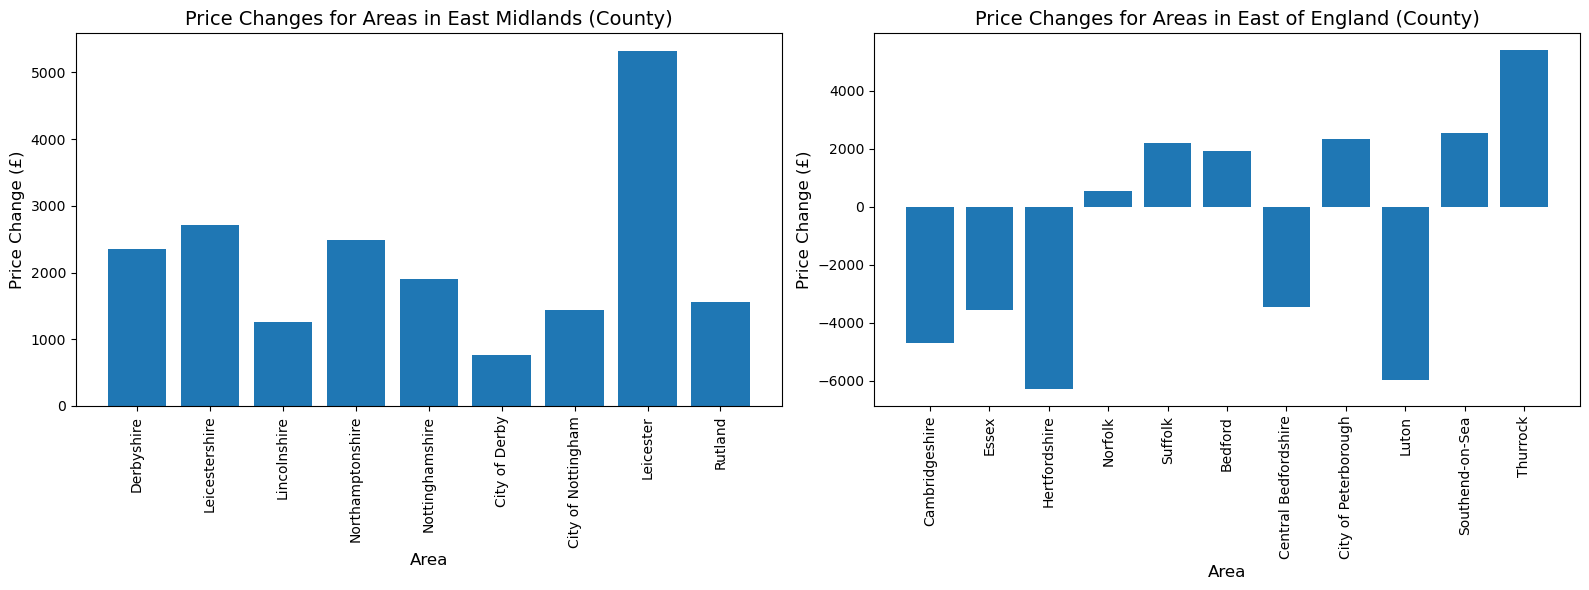

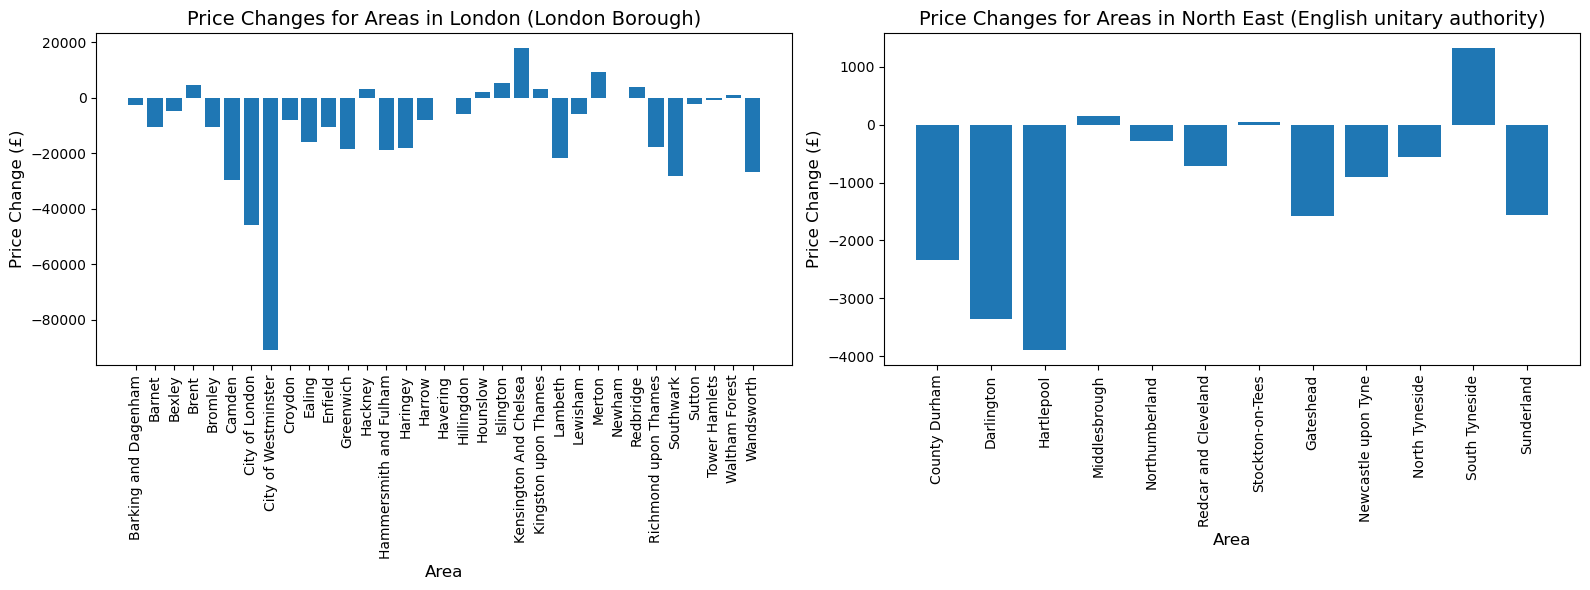

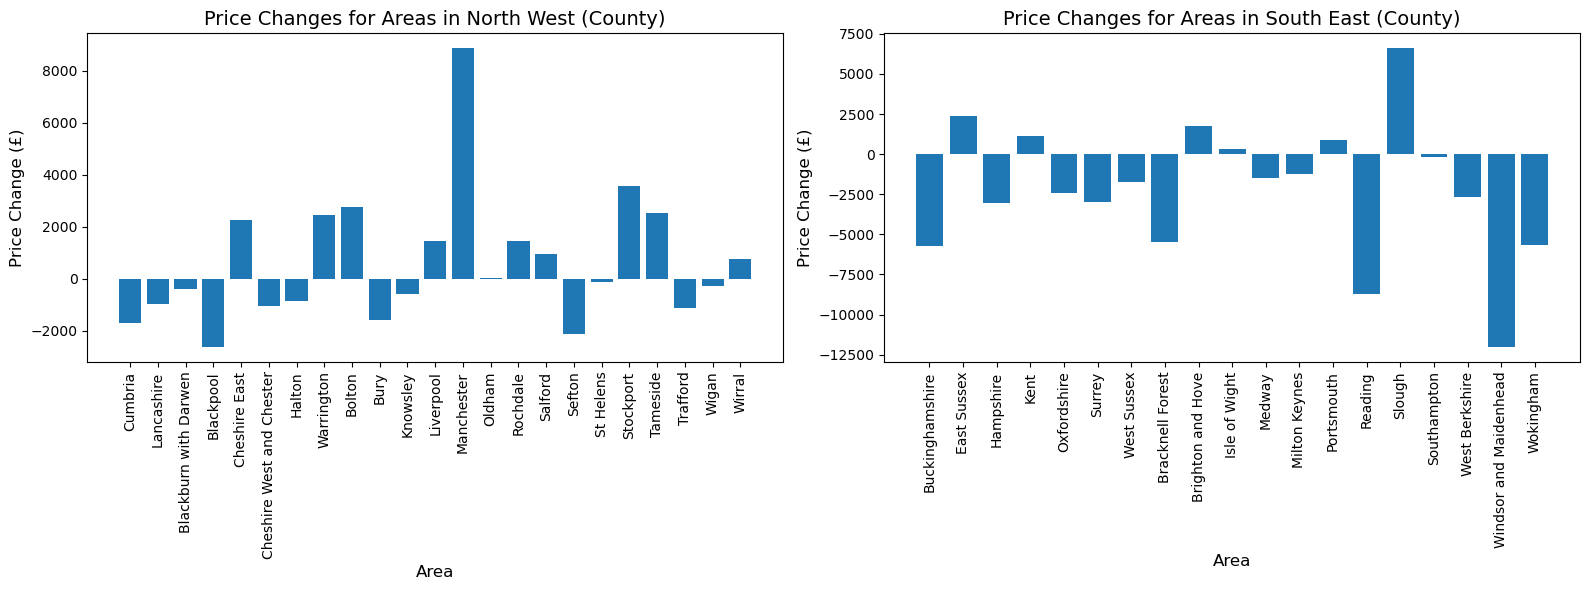

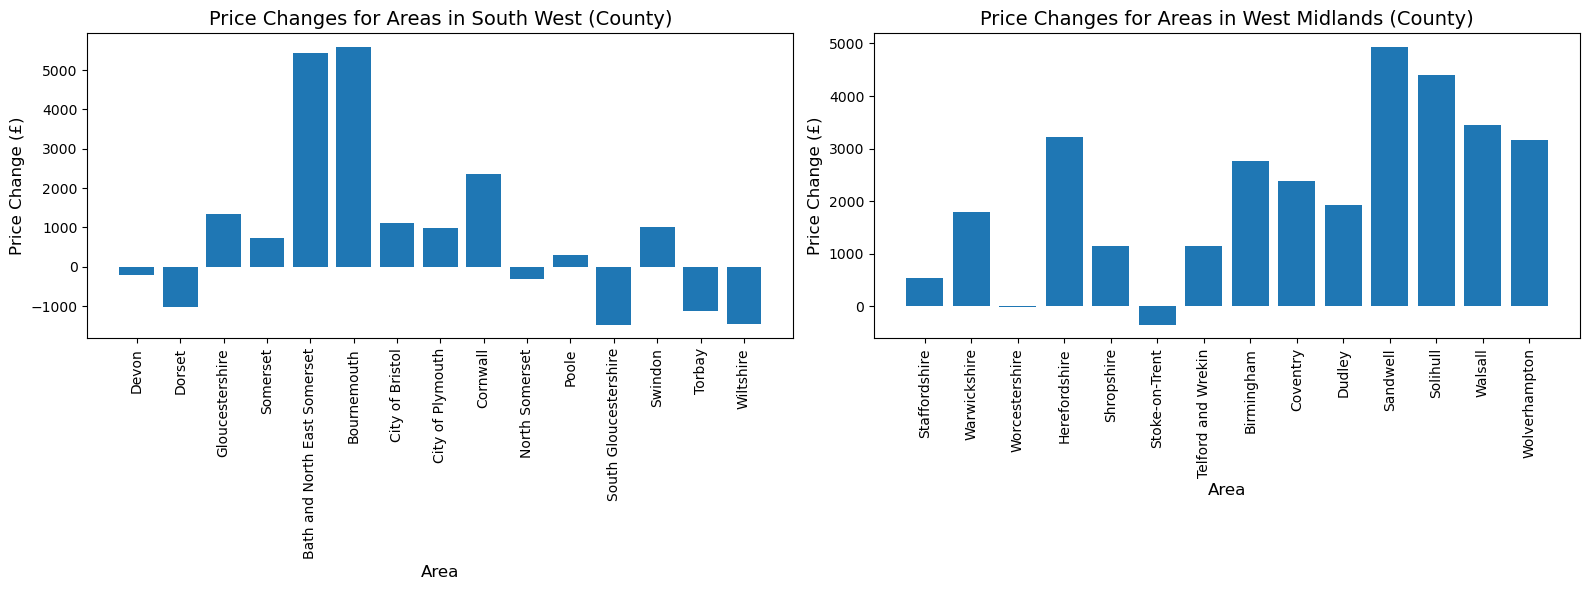

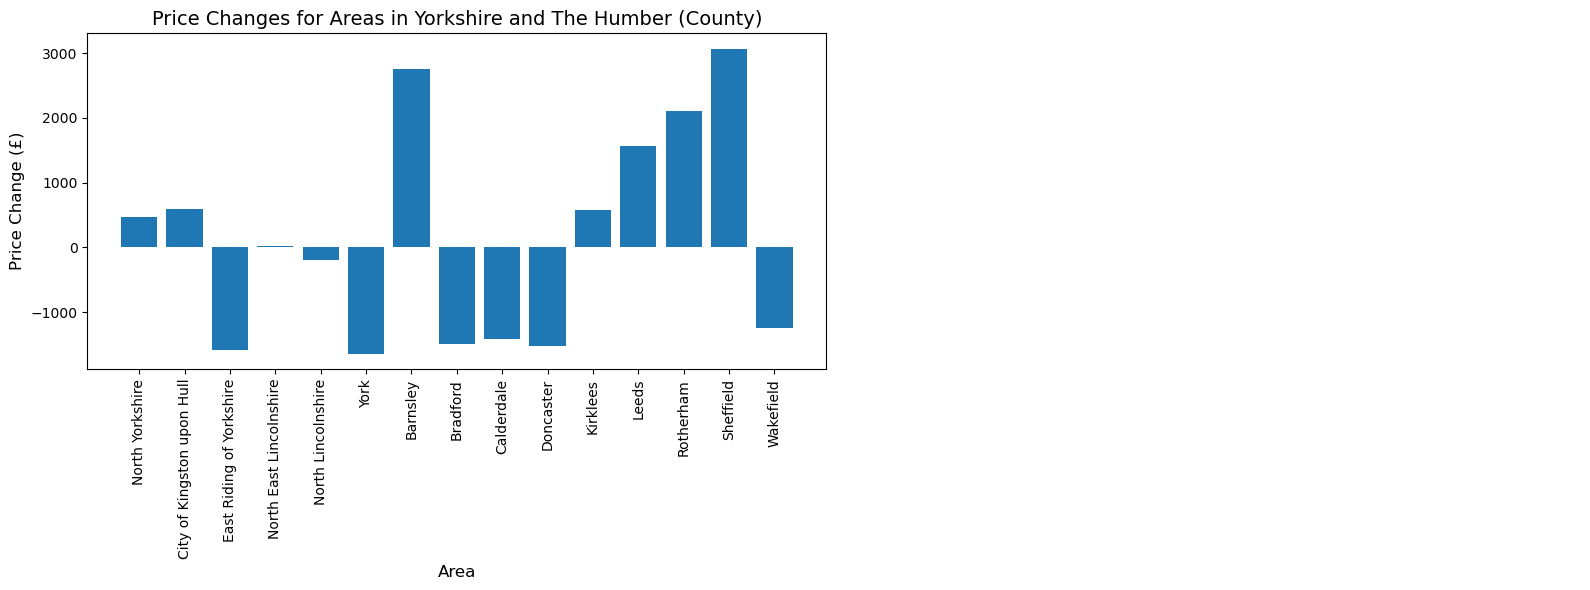

In [23]:
import matplotlib.pyplot as plt

#group data by region
grouped_data = list(price_pivot.groupby('RegionName'))

#loop through regions and plot two per row
for i in range(0, 9, 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    #plot the first region
    region1, group1 = grouped_data[i]
    areas1 = group1.index.get_level_values('Area')
    area_type1 = group1.index.get_level_values('AreaType')[0]  #access AreaType from index
    axes[0].bar(areas1, group1['PriceChange'])
    axes[0].set_title(f'Price Changes for Areas in {region1} ({area_type1})', fontsize=14)
    axes[0].set_xlabel('Area', fontsize=12)
    axes[0].set_ylabel('Price Change (£)', fontsize=12)
    axes[0].tick_params(axis='x', rotation=90, labelsize=10) #rotate area names to avoid overlap
    
    #plot the second region, up until the 9th plot
    if i + 1 < 9:
        region2, group2 = grouped_data[i + 1]
        areas2 = group2.index.get_level_values('Area')  
        area_type2 = group2.index.get_level_values('AreaType')[0] 
        axes[1].bar(areas2, group2['PriceChange'])
        axes[1].set_title(f'Price Changes for Areas in {region2} ({area_type2})', fontsize=14)
        axes[1].set_xlabel('Area', fontsize=12)
        axes[1].set_ylabel('Price Change (£)', fontsize=12)
        axes[1].tick_params(axis='x', rotation=90, labelsize=10)
    else:
        axes[1].axis('off')  #hide unused subplot for last

    #display bar graphs
    plt.tight_layout()
    plt.show()

The bar plots show significant variations in property price changes across areas within regions:

- East Midlands: Leicester experienced the largest increase within the region (over £5,000), while the City of Derby saw minimal increase (<£1,000). However, all areas within the East Midlands experienced growth, which gives insight into the overall positive market trend in this region during the period and the similarity between the areas.
- West Midlands: A similar positive trend is observed, with Sandwell and Solihull leading in price increases (both between $£4,000-£5,000), Stoke-on-Trent did experience a small decline which shows some differences for this region.
- South East and East of England: These regions displayed contrasting trends. Areas like Reading and Windsor and Maidenhead experienced notable decreases, while others, such as Slough, showed significant increases. This diversity highlights more segmented markets within these regions.
- London and North East: Both regions show similar patterns, with most areas experiencing declines. Westminster in London stands out with steep decreases (over £80,000), though some boroughs in London and areas in the North East recorded small gains.
- North West: This region experienced one of the most divided pattern where half of the areas flat prices are in decline and half are increases. Manchester stands out with significant increase (>£8,000), while other areas like Blackpool experienced declines, potentially reflecting the influence of urban regeneration.
- Yorkshire and The Humber: Price changes were mixed, with Sheffield and Barnsley showing increases, while areas like East Riding of Yorkshire experienced declines, emphasising regional disparities.
- South West: Most areas in the region saw increases, although some experienced declines, showcasing a primarily upward trend with some exceptions.

Overall, these patterns suggest that property price changes are influenced by regional dynamics, with some areas reflecting consistent growth, others showing consistent decline and some showing significant variability.

## Section 3: Statistical Analysis

This section formulates a contingency table and from that uses two methods to test the independence of region and the price change direction (increase/decrease). The Null hypothesis is stated as follows:

$H_0$: The price change direction (increase/decrease) is independent of the region

### Section 3.1 Cross-Tabulation

This section forms a cross-tabulation to summarise the number of areas within each region where property prices increased or decreased between July 2017 and July 2018. This will be used as a contigency table for statistical tests of independence under the null hypothesis stated above. 

In [29]:
#see if value is more or less than 0 to determine if it has increased or decreased
price_pivot['I_or_D'] = (price_pivot['PriceChange'] > 0)

#cross-tabulate the counts of increases and decreases by region
cross_tab = pd.crosstab(index=price_pivot.index.get_level_values('RegionName'),
                        columns=price_pivot['I_or_D'],
                        rownames=['Region'],
                        colnames=['Change'])

#rename columns to 'increased' and 'decreased'
cross_tab.rename(columns={False: 'Decreased', True: 'Increased'}, inplace=True)

#tranpose table
contingency = cross_tab.T 

#display the cross-tabulation
print('\nContingency Table:')
display(contingency)


Contingency Table:


Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decreased,0,5,23,9,12,13,6,2,7
Increased,9,6,10,3,11,6,9,12,8


The table shows regional differences in property price changes. The East Midlands had only increases, emphasising strong growth. In contrast, London had the highest number of decreases (23), indicating a declining market in this period. Most other regions showed mixed trends, with around half leaning toward more increases and the other half more decreases across areas.

### Section 3.2 Chi-Square Test (G-test statistic)

This section performs a chi-square test using the G-test statistic to assess the independence between regions and property price changes.

In [33]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

#chi-square test
test_stat_c, p_value_c, dof_c, expected_c = stats.chi2_contingency(contingency, correction=False, 
                                                           lambda_ = "log-likelihood")
#deviations
deviations = contingency - expected_c.round(1)

#display results
print('\nThe G test statistic is %4.2f' % test_stat_c)
print('The p-value is %4.3f %%' % (100 * p_value_c))
print('\nDeviations from Expected Frequencies:')
display(deviations)


The G test statistic is 32.19
The p-value is 0.009 %

Deviations from Expected Frequencies:


Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decreased,-4.6,-0.6,6.2,2.9,0.3,3.3,-1.6,-5.1,-0.6
Increased,4.6,0.6,-6.2,-2.9,-0.3,-3.3,1.6,5.1,0.6


### Section 3.3 Permutation Test

This section performs a permutation test using the G-test statistic to assess the independence between regions and property price changes. 

This table shows the expected frequencies for each cell under the null hypothesis of independence between regions and property price changes. This logic is used to compare observed and expected values, calculate deviations, and derive the G-test statistic for the permutation test.

| Region                   | East Midlands | East of England | London | North East | North West | South East | South West | West Midlands | Yorkshire and The Humber | **Total**          |
|:--------------------------:|:---------------:|:-----------------:|:--------:|:------------:|:------------:|:------------:|:------------:|:---------------:|:---------------------------:|:--------------------:|
| **Change**       |               |                 |        |            |            |            |            |               |                           |
| **Decreased**  $R\cdot C/N$  | $R_1 \cdot C_1/N$   | $R_2 \cdot C_2/N$| $R_3 \cdot C_3/N$ | $R_4 \cdot C_4/N$   | $R_5 \cdot C_5/N$   | $R_6 \cdot C_6/N$  | $R_7 \cdot C_7/N$  | $R_8 \cdot C_8/N$ |$R_9 \cdot C_9/N$                  | $R$ |u
| **Increased**  $R\cdot (1-C/N)$          | $R_1 \cdot (1-C_1/N)$   | $R_2 \cdot (1-C_2/N)$| $R_3 \cdot (1-C_3/N)$ | $R_4 \cdot (1-C_4/N)$   | $R_5 \cdot (1-C_5/N)$   | $R_6 \cdot (1-C_6/N)$  | $R_7 \cdot (1-C_7/N)$  | $R_8 \cdot (1-C_8/N)$ |$R_9 \cdot (1-C_9/N)$    | $N - R$ |
| **Column Total**         | $C_1$   | $C_2$ | $C_3$ | $C_4$   | $C_5$   | $C_6$  | $C_7$  | $C_8$ |$C_9$                  | $N$ |


Where:

- $R_i$ = Total observations in a row (number of increased/decreased in a region) $i$
- $C_i$ = Total observations in a column (number of observations in a region) $i$ ($D_i$+$I_i$)
- $N$ = Total of all observations within the table

In [38]:
import numpy as np

def calculate_g_stat(contingency_table):
    
    observed = contingency_table.values
    row_totals = observed.sum(axis=1)  #sum across rows
    col_totals = observed.sum(axis=0)  #sum across columns
    grand_total = observed.sum()
    
    #calculate the expected table
    expected = (row_totals.reshape(-1, 1) * col_totals.reshape(1, -1)) / grand_total
    
    #avoid division errors by ignoring observed == 0
    g_stat = 2 * np.nansum(observed * np.log(observed / expected, where=observed > 0))
    
    return g_stat

def permute_and_calculate_g_stat(regions_data, price_change_data):

    #shuffle the target data
    shuffled_target = np.random.permutation(price_change_data)
    
    #create a new DataFrame with predictor and shuffled target
    permuted_df = pd.DataFrame({'RegionName': regions_data, 'PriceChange': shuffled_target})

    #create a contingency table
    permuted_contingency = pd.crosstab(
        index=permuted_df['RegionName'],
        columns=(permuted_df['PriceChange'] > 0))

    #calculate and return the g-stat
    return calculate_g_stat(permuted_contingency)

def permutation_test_g_stat(regions_data, price_change_data, n_permutations=10000):
  
    #create observed contingency table
    observed_contingency = pd.crosstab(
        index=regions_data,
        columns=(price_change_data > 0))

    #calculate the observed g-test statistic
    observed_g_stat = calculate_g_stat(observed_contingency)

    #create a null distribution of G-statistics
    g_stats = [permute_and_calculate_g_stat(regions_data, price_change_data) for _ in range(n_permutations)]

    #calculate p-value
    g_stats = np.array(g_stats)
    p_value = np.mean(g_stats >= observed_g_stat)

    return observed_g_stat, p_value, g_stats

#inputs for functions
regions_data = price_pivot.index.get_level_values('RegionName').values
price_change_data = price_pivot['PriceChange'].values

#carry out permutation test
observed_g_stat, p_value, g_stat_distribution = permutation_test_g_stat(regions_data, price_change_data)

#output results
print('\nThe Observed G-Test Statistics  %4.2f' % observed_g_stat)
print('The p-value is %4.3f %%' % (100 * p_value))


The Observed G-Test Statistics  32.19
The p-value is 0.020 %


## Section 4: Discussion

### Section 4.1: What is Being Tested?

These tests are testing the null hypothesis ($H_0$) i.e. the direction of property price changes (increase/decrease) is independent of the region. Under this hypothesis, the distribution of price changes is expected to be consistent across regions without any significant regional influence. 

Testing for independence is important as it provides insight into whether regional factors may be influencing property price trends. If independence is rejected, it suggest that some regions may have unique trends that deviate from the overall market pattern, which could be useful for regional policy-making or economic planning for example.

The chi-squared test and permutation tests performed both evaluate whether variables are independent, but they take different approaches:

- The chi-squared test uses a theoretical null distribution and calculates the test statistic based on deviations between observed and expected frequencies, which works well for large datasets but not with smaller or uneven datasets.
- The permutation test creates an empirical distribution by shuffling the data, so it doesn’t rely on theoretical assumptions.
- Overall the chi-squared test is quicker and useful for quickly identifying whether significant associations exist between variables (such as regions and property price changes) but the permutation test is more flexible and useful for understanding the structure of the data by directly comparing observed patterns to what might occur by chance.


### Section 4.2: Results and Conclusions

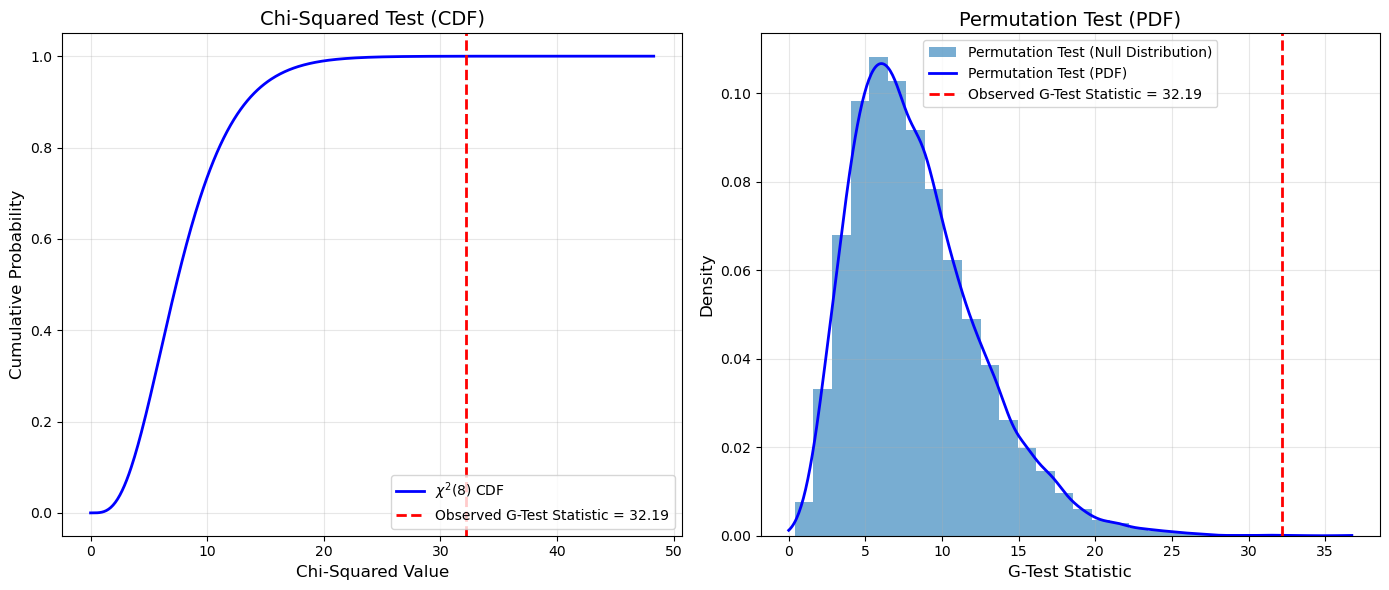

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, gaussian_kde

#chi-squared CDF plot
x = np.linspace(0, observed_g_stat * 1.5, 500)
chi_squared_cdf = chi2.cdf(x, df=dof_c)

#(KDE) for permutation test
kde = gaussian_kde(g_stat_distribution)
x_perm = np.linspace(0, max(g_stat_distribution), 500)  # Range for the KDE

# plot figures
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(x, chi_squared_cdf, label=r'$\chi^2(8)$ CDF', color="blue", lw=2)
axes[0].axvline(test_stat_c, color="red", linestyle="dashed", lw=2, label=f"Observed G-Test Statistic = {test_stat_c:.2f}")
axes[0].set_title("Chi-Squared Test (CDF)", fontsize=14)
axes[0].set_xlabel("Chi-Squared Value", fontsize=12)
axes[0].set_ylabel("Cumulative Probability", fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

axes[1].hist(g_stat_distribution, bins=30, density=True, alpha=0.6, label="Permutation Test (Null Distribution)")
axes[1].plot(x_perm, kde(x_perm), color="blue", lw=2, label="Permutation Test (PDF)")
axes[1].axvline(observed_g_stat, color="red", linestyle="dashed", lw=2, label=f"Observed G-Test Statistic = {observed_g_stat:.2f}")
axes[1].set_title("Permutation Test (PDF)", fontsize=14)
axes[1].set_xlabel("G-Test Statistic", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

#display the plots
plt.tight_layout()
plt.show()


The chi-squared and permutation tests were carried out to assess the independence between regions and property price changes. 

- The chi-squared test had a G-test statistic of 32.19 and a p-value of 0.009%, the graph to the left shows the observed G-test statistic (red line) falls in the extreme tail, indicating the observed data is unlikely under the null hypothesis of independence. Therefore, we can reject the null hypothesis of independence that the price change direction is independent of the region  at the 1% significance level. This suggests that property price changes are not independent of regions.
- The permutation test had a G-test statistic of 32.19 and a p-value of roughly 0.020% (this changes each time the test is run), the graph to the right shows the observed G-test statistic (red line) again falls far into the tail of the distribution, consistent with the chi-squred test. Therefore, we can also reject the null-hypothesis based on this test too.

The chi-squared test gave a slightly lower p-value than the permutation test (0.009% vs. 0.020%). This difference is based on how the two tests work with the chi-squared test relies on a theoretical model that assumes everything about the data is ideal, while the permutation test builds a null distribution by shuffling the actual data. Although both tests reject the null hypothesis, the chi-squared test might give a slightly lower p-value because it doesn’t account for the randomness as the permutation test does.

Overall, both tests support the conclusion that regions play a significant role in the direction (increase/decrease) of property price changes.